In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree


In [49]:
data_ = pd.read_csv("application_train.csv")

In [50]:
df_ = pd.DataFrame(data_)

In [51]:
df_.shape

(307511, 33)

In [52]:
df_.columns


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2'],
      dtype='object')

In [53]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [54]:
df_.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1,Laborers,1.0,2,2,WEDNESDAY,10,0,Business Entity Type 3,0.262949
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,Core staff,2.0,1,1,MONDAY,11,0,School,0.622246
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1,Laborers,1.0,2,2,MONDAY,9,0,Government,0.555912
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,1,Laborers,2.0,2,2,WEDNESDAY,17,0,Business Entity Type 3,0.650442
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1,Core staff,1.0,2,2,THURSDAY,11,0,Religion,0.322738


# Data Train


In [55]:
data=pd.read_csv("data_train.csv")

In [56]:
df=pd.DataFrame(data)

In [57]:
df.shape

(307511, 33)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [59]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2'],
      dtype='object')

In [60]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,1,Laborers,1.0,2,2,WEDNESDAY,10,0,Business Entity Type 3,0.262949
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,Core staff,2.0,1,1,MONDAY,11,0,School,0.622246
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1,Laborers,1.0,2,2,MONDAY,9,0,Government,0.555912
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,1,Laborers,2.0,2,2,WEDNESDAY,17,0,Business Entity Type 3,0.650442
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1,Core staff,1.0,2,2,THURSDAY,11,0,Religion,0.322738


In [61]:
num_nulls= df.isnull().sum()
num_nulls

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,12


In [62]:
total_rows = df.shape[0]
null_percent = (num_nulls * 100) / total_rows
null_percent

,0
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
AMT_CREDIT,0.000000
AMT_ANNUITY,0.003902


In [63]:
null_columns = null_percent[null_percent > 0].index
null_columns

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2'],
      dtype='object')

# the data Types of this columns

| Column Name       | Data Type   |
| ----------------- | ----------- |
| `AMT_ANNUITY`     | Numerical   |
| `AMT_GOODS_PRICE` | Numerical   |
| `NAME_TYPE_SUITE` | Categorical |
| `OCCUPATION_TYPE` | Categorical |
| `CNT_FAM_MEMBERS` | Numerical   |
| `EXT_SOURCE_2`    | Numerical   |


## Numerical columns

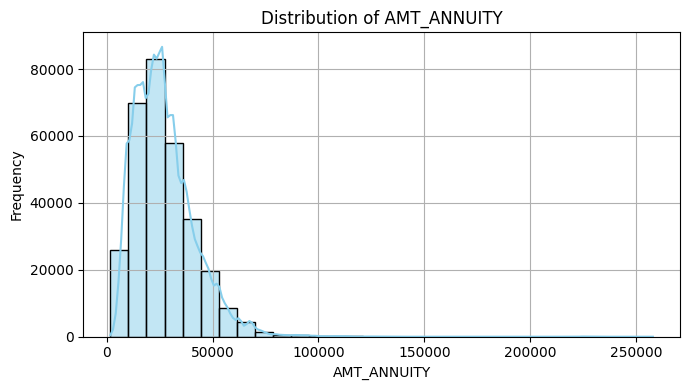

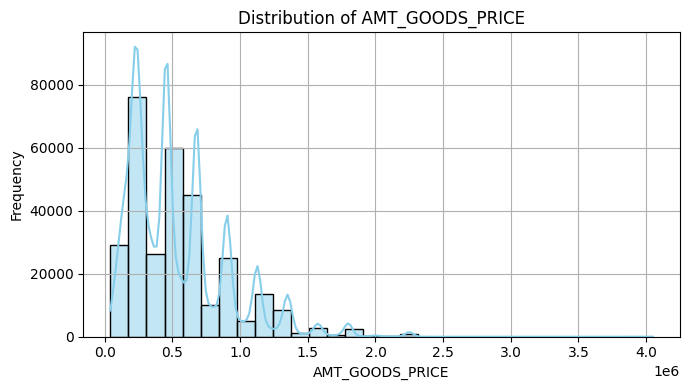

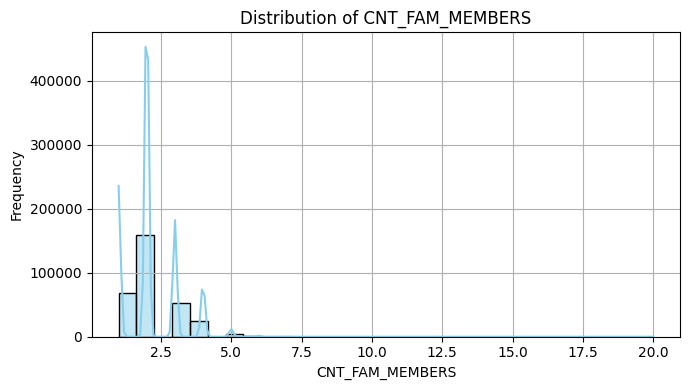

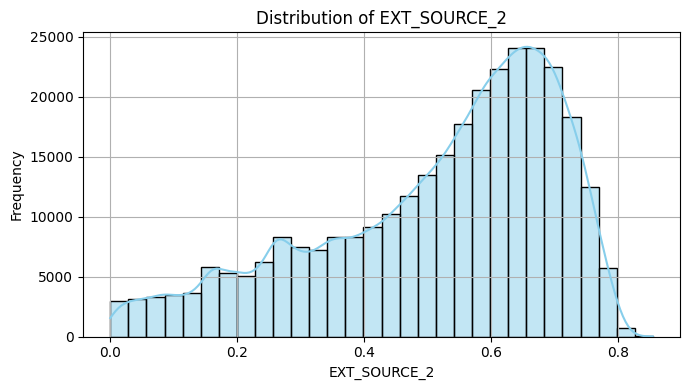

In [64]:
numeric_null_cols = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2']

for col in numeric_null_cols:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [65]:
for col in numeric_null_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)


/tmp/ipython-input-65-2631941866.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


## Categorical Columns

In [66]:
categorical_nulls = ['NAME_TYPE_SUITE', 'OCCUPATION_TYPE']

for col in categorical_nulls:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)


/tmp/ipython-input-66-3134592862.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [67]:
df.isnull().any()

,0
SK_ID_CURR,False
TARGET,False
NAME_CONTRACT_TYPE,False
CODE_GENDER,False
FLAG_OWN_CAR,False
FLAG_OWN_REALTY,False
CNT_CHILDREN,False
AMT_INCOME_TOTAL,False
AMT_CREDIT,False
AMT_ANNUITY,False


In [68]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
307506,False
307507,False
307508,False
307509,False


## Outliers ?!

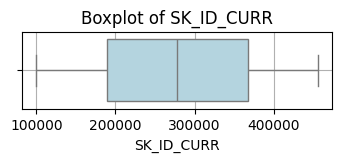

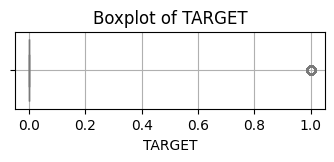

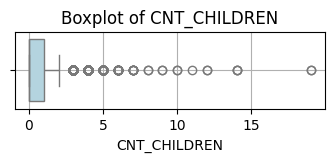

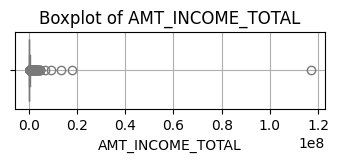

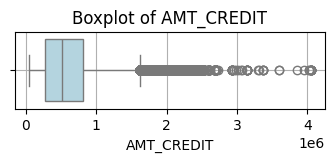

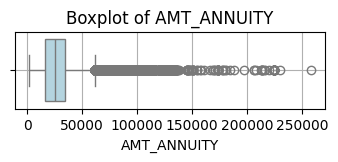

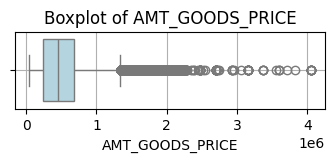

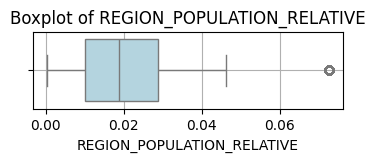

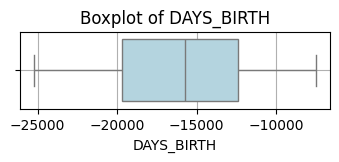

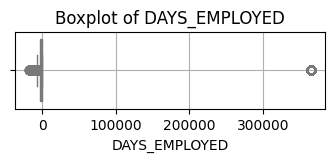

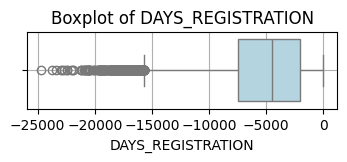

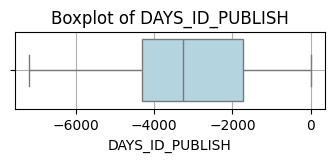

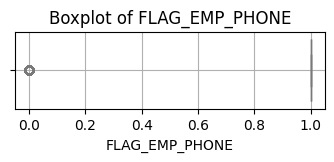

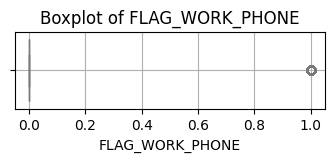

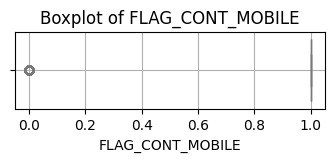

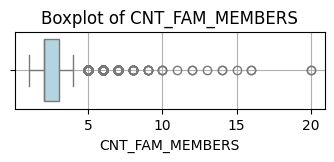

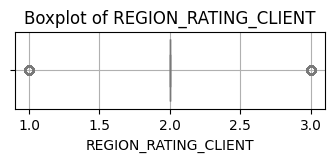

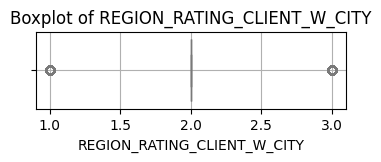

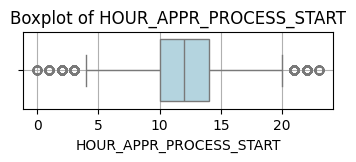

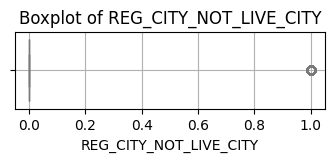

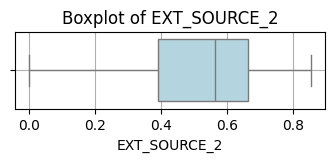

In [69]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:
    plt.figure(figsize=(4, 1))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()

In [70]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
continuous_cols = [col for col in numeric_columns if df[col].nunique() > 2]

df_cleaned = df.copy()

for col in continuous_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df= df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df.shape


(153778, 33)

## One Hot Encoding

In [71]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,False,False,False,False,False,False,False,False,False,False
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,False,False,False,False,False,False,False,False,False,False
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,False,False,False,False,False,False,False,False,False,False
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,False,False,False,False,False,False,False,False,False,False
5,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307493,456237,0,0,135000.0,946764.0,37678.5,765000.0,0.019689,-17533,-2306,...,False,False,False,False,False,False,False,False,False,False
307497,456241,0,0,180000.0,270126.0,12028.5,193500.0,0.007020,-16679,-1222,...,False,False,False,False,True,False,False,False,False,False
307500,456244,0,0,261000.0,1303812.0,35982.0,1138500.0,0.031329,-20390,-5326,...,False,False,False,False,False,False,False,False,False,False
307503,456247,0,0,112500.0,345510.0,17770.5,247500.0,0.022800,-11870,-399,...,False,False,False,False,False,False,False,False,False,False


# correlation Matrix

In [72]:
corr_matrix = df.corr()['TARGET']
corr_matrix

,TARGET
SK_ID_CURR,-0.000766
TARGET,1.000000
CNT_CHILDREN,0.000085
AMT_INCOME_TOTAL,-0.005093
AMT_CREDIT,-0.015868
...,...
ORGANIZATION_TYPE_Transport: type 1,-0.001638
ORGANIZATION_TYPE_Transport: type 2,-0.002841
ORGANIZATION_TYPE_Transport: type 3,0.015789
ORGANIZATION_TYPE_Transport: type 4,-0.001030


In [73]:
corr_= df.corr(method='spearman')['TARGET'].sort_values(ascending=False)
corr_

,TARGET
TARGET,1.000000
DAYS_EMPLOYED,0.066355
NAME_EDUCATION_TYPE_Secondary / secondary special,0.055892
DAYS_BIRTH,0.054862
CODE_GENDER_M,0.053587
...,...
NAME_CONTRACT_TYPE_Revolving loans,-0.034615
NAME_EDUCATION_TYPE_Higher education,-0.060754
EXT_SOURCE_2,-0.143579
REGION_RATING_CLIENT,NaN


## Balanced or Not

In [74]:
target_counts = df['TARGET'].value_counts()
target_counts

,count
TARGET,
0,139896
1,13882


In [75]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']


In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [77]:
#!pip install imbalanced-learn


In [78]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [79]:
from collections import Counter

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({0: 111916, 1: 11106})
After SMOTE: Counter({0: 111916, 1: 111916})


# Decision Tree


In [80]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [81]:
y_train_pred = dt_model.predict(X_train_resampled)
y_test_pred = dt_model.predict(X_test)

In [82]:
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {accuracy_train:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")

Train Accuracy: 1.0000
Test Accuracy: 0.8260


# OverFitting !!! 😱😱

# 1 ( RandomForestClassifier)

In [83]:
# from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [84]:
y_train_pred_rf = rf_model.predict(X_train_resampled)
y_test_pred_rf = rf_model.predict(X_test)

In [85]:
accuracy_train_rf = accuracy_score(y_train_resampled, y_train_pred_rf)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Random Forest - Train Accuracy: {accuracy_train_rf:.4f}")
print(f"Random Forest - Test Accuracy: {accuracy_test_rf:.4f}")

Random Forest - Train Accuracy: 1.0000
Random Forest - Test Accuracy: 0.9075


# 2 (XGBoost Classifier)

In [86]:
#!pip install xgboost

In [87]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:32:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [88]:
y_train_pred = xgb_model.predict(X_train_resampled)
y_test_pred = xgb_model.predict(X_test)

In [89]:
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"XGBoost - Train Accuracy: {train_accuracy:.4f}")
print(f"XGBoost - Test Accuracy: {test_accuracy:.4f}")

XGBoost - Train Accuracy: 0.9506
XGBoost - Test Accuracy: 0.9088


# Roc

In [90]:
# ROC
y_test_proba = xgb_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

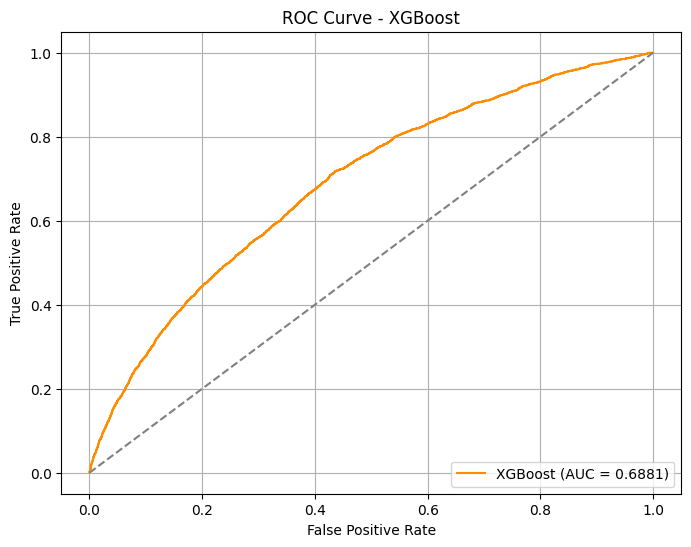

In [91]:
# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc_score:.4f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# AUC Curve

In [93]:
auc = roc_auc_score(y_test, y_test_proba)
print(f"XGBoost AUC: {auc:.4f}")

XGBoost AUC: 0.6881


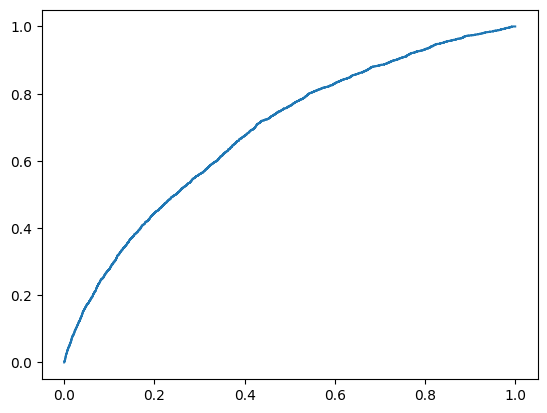

In [94]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")